In [8]:
import pandas as pd

data = pd.read_csv("Invisibility Cloak.csv")

In [9]:
data

,Participant,Cloak,Mischief
0,1,0,3
1,2,0,1
2,3,0,5
3,4,0,4
4,5,0,6
5,6,0,4
6,7,0,6
7,8,0,2
8,9,0,0
9,10,0,5


In [27]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import statistics as st
import math

cloak_on = data[data['Cloak'] == 1]['Mischief']
cloak_off = data[data['Cloak'] == 0]['Mischief']

<h3>Assumption 1</h3>
<b>Continuous Dependent Variable (Mischief)</b>

We assume that the dependent variable (Mischief) is continuous. Since mischief is numerical, it meets this assumption

<h3>Assumption 2</h3>
<b>Independent Cloak Variable</b>

The two groups in Cloak should be independent. Since each participant is in only one group, they don't influence one another and so, the assumption is met.

<h3>Assumption 3</h3>
<b>Normality Check Using Shapiro-Wilk Test</b>

In [28]:
shapiro_cloak_on = stats.shapiro(cloak_on)
shapiro_cloak_off = stats.shapiro(cloak_off)

print(f"Shapiro-Wilk Test for Cloak ON: Statistic={shapiro_cloak_on.statistic}, p-value={shapiro_cloak_on.pvalue}")
print(f"Shapiro-Wilk Test for Cloak OFF: Statistic={shapiro_cloak_off.statistic}, p-value={shapiro_cloak_off.pvalue}")

Shapiro-Wilk Test for Cloak ON: Statistic=0.9726166907872743, p-value=0.9361892037703956
Shapiro-Wilk Test for Cloak OFF: Statistic=0.9127634937409539, p-value=0.2314459072953191


<i> Since the p-value is greater than the alpha of 0.05, the data is normally distributed. </i>

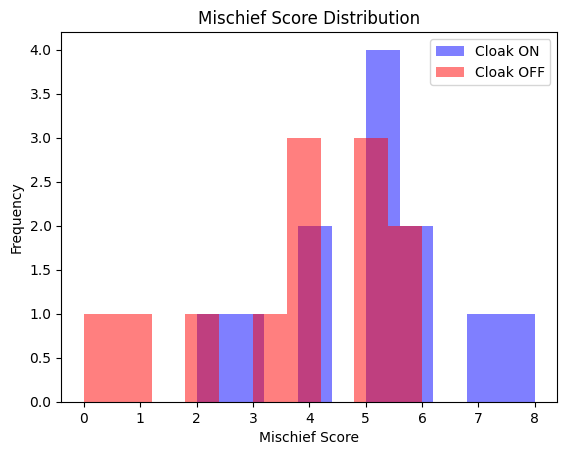

In [29]:
plt.hist(cloak_on, alpha=0.5, color='blue', label='Cloak ON')
plt.hist(cloak_off, alpha=0.5, color='red', label='Cloak OFF')
plt.legend(loc='upper right')
plt.xlabel('Mischief Score')
plt.ylabel('Frequency')
plt.title('Mischief Score Distribution')
plt.show()

<h3>Assumption 4</h3>
<b>Homogeneity of Variances (Levene's Test)</b>

We use Levene’s Test to check if the variances in the two groups are equal. The independent t-test assumes equal variances (homoscedasticity).

In [30]:
levene_test = stats.levene(cloak_on, cloak_off)
print(f"Levene's Test for Equal Variance: Statistic={levene_test.statistic}, p-value={levene_test.pvalue}")

Levene's Test for Equal Variance: Statistic=0.2697547683923706, p-value=0.6086825890641905


<i>Since the p-value > 0.05, we assume that the variances are equal, and we can now use the t-test</i>

<h3>Assumption 5</h3>
<b>Independent Samples T-Test</b>

We use independent Samples T-Test to compare the means of the two independent groups (Cloak ON vs Cloak OFF).

In [26]:
t_test = stats.ttest_ind(cloak_on, cloak_off, equal_var=True)
print(f"T-test: Statistic={t_test.statistic}, p-value={t_test.pvalue}")

T-test: Statistic=1.713459383965147, p-value=0.10068634487481125


<i>Since the p-value is greater than 0.05, we conclude that there is no significant difference between the two groups.</i>

# Report of Independent Samples T-Test: 

## Assumptions
1. **Continuous Dependent Variable**: The dependent variable, Mischief, is continuous.
2. **Independent Observations**: The two groups, Cloak On and Cloak Off, are independent.
3. **Normality**:
    - Cloak On group: p-value = 0.936
    - Cloak Off group: p-value = 0.231. Normality assumption is met since the both cloak on and cloak off > 0.05 
4. **Homogeneity of Variances**: Levene’s test p-value = 0.608.  The assumption of equal variances is met since levene test pvalue > 0.05.
5. **Independent Samples T-Test**:
    - T-statistic = 1.713
    - p-value = 0.101
   Conclusion: The result suggests that there is no significant difference.